In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Our tiny vocabulary (2D for visualization)
word_vectors = {
    "cat":    np.array([0.7, 0.8]),
    "dog":    np.array([0.8, 0.9]),
    "love":   np.array([0.9, 0.3]),
    "hate":   np.array([-0.8, 0.3]),
    "pizza":  np.array([0.6, -0.2]),
    "car":    np.array([-0.3, -0.7]),
}
print("'cat' as a vector:", word_vectors["cat"])
# Output: [0.7 0.8]

'cat' as a vector: [0.7 0.8]


In [2]:
def euclidean_distance(vec1, vec2):
    """How far apart are two points?"""
    return np.linalg.norm(vec1 - vec2)
# Compare distances
cat_to_dog = euclidean_distance(word_vectors["cat"], word_vectors["dog"])
cat_to_car = euclidean_distance(word_vectors["cat"], word_vectors["car"])
print(f"cat → dog: {cat_to_dog:.3f}")  # Small distance
print(f"cat → car: {cat_to_car:.3f}")  # Large distance
# Output:
# cat → dog: 0.141  ✓ (very close!)
# cat → car: 1.864  ✓ (far apart!)

cat → dog: 0.141
cat → car: 1.803


In [4]:
def cosine_similarity(vec1, vec2):
    """How aligned are two vectors? (1 = same direction, -1 = opposite)"""
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
print(f"cat ↔ dog: {cosine_similarity(word_vectors['cat'], word_vectors['dog']):.3f}")
print(f"love ↔ hate: {cosine_similarity(word_vectors['love'], word_vectors['hate']):.3f}")
# Output:
# cat ↔ dog: 0.996  ✓ (almost identical!)
# love ↔ hate: -0.437 ✓ (opposite!)

cat ↔ dog: 1.000
love ↔ hate: -0.777


In [5]:
def find_similar_words(target_word, word_vectors, top_n=3):
    """Find the most similar words to target_word"""
    
    if target_word not in word_vectors:
        return f"'{target_word}' not in vocabulary"
    
    target_vec = word_vectors[target_word]
    similarities = {}
    
    for word, vec in word_vectors.items():
        if word == target_word:  # skip the word itself
            continue
        similarities[word] = cosine_similarity(target_vec, vec)
    
    # Sort by similarity (highest first)
    sorted_words = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    
    return sorted_words[:top_n]
# Test it
similar_to_cat = find_similar_words("cat", word_vectors)
print("\nWords similar to 'cat':")
for word, score in similar_to_cat:
    print(f"  {word}: {score:.3f}")
# Output:
# Words similar to 'cat':
#   dog: 0.996   ✓
#   pizza: 0.661
#   love: 0.600


Words similar to 'cat':
  dog: 1.000
  love: 0.863
  pizza: 0.387


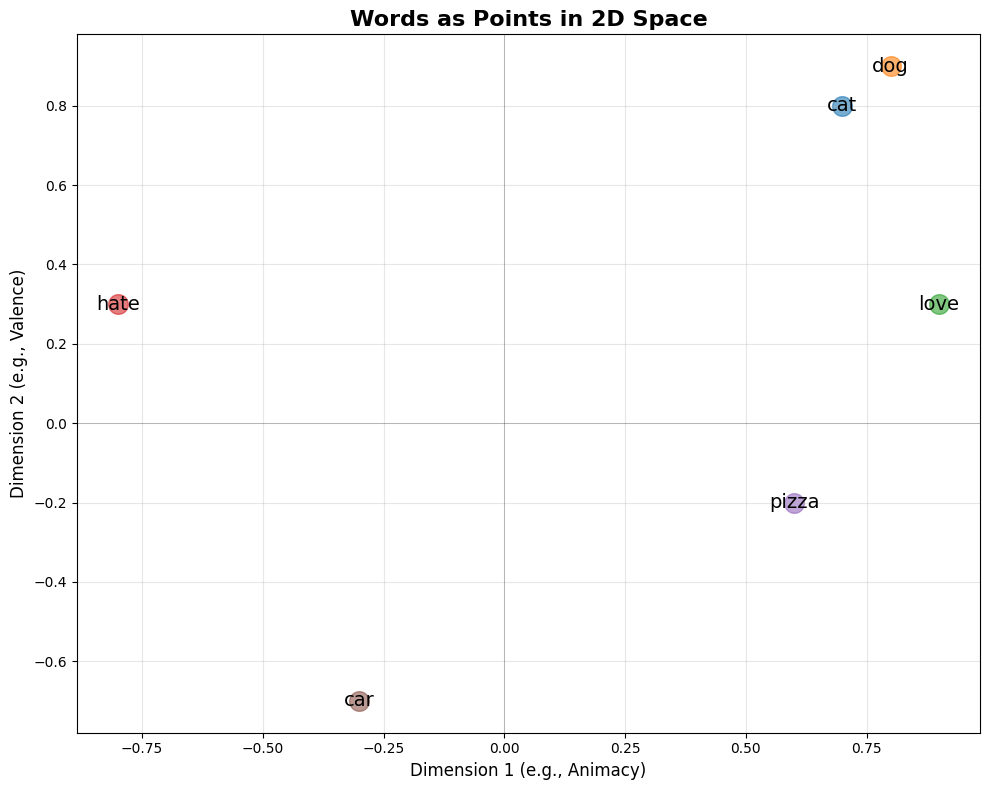

In [6]:
def plot_word_space(word_vectors):
    """Visualize words in 2D space"""
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot each word
    for word, vec in word_vectors.items():
        x, y = vec[0], vec[1]
        ax.scatter(x, y, s=200, alpha=0.6)
        ax.annotate(word, (x, y), fontsize=14, ha='center', va='center')
    
    # Add grid and labels
    ax.axhline(y=0, color='k', linewidth=0.5, alpha=0.3)
    ax.axvline(x=0, color='k', linewidth=0.5, alpha=0.3)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('Dimension 1 (e.g., Animacy)', fontsize=12)
    ax.set_ylabel('Dimension 2 (e.g., Valence)', fontsize=12)
    ax.set_title('Words as Points in 2D Space', fontsize=16, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('word_space.png', dpi=150)
    plt.show()
plot_word_space(word_vectors)